__Feature Scalling__
- Feature scalling is a technique to stanadardize the independent feature present in the data in a fixed range 

__🚀 Why Feature Scaling?__

- Many ML algorithms work by calculating distances or gradients.
- If one feature is in meters (0–10) and another in rupees (0–10,000), the larger range dominates the model.

- Feature scaling solves this by bringing all features to a similar scale.

__Types of Feature Scalling__

1. Standarization
2. Normalization

__Standarization (Z-score normalization)__

- Transforms data to mean = 0 and standard deviation = 1.

eg.  

- <b style="color:red">Formula  --->> Xscaled = (X - Xmean)/standard deviation</b>

- The mean of new data is zero and standard deviation is 1 

__Geometric Intution__

- Agr standard deviation 1 se jyada h to squeze krenge or agr km hua to expand krenge 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r'C:\Users\Lenovo\Krishnaraj singh\Code\newml\Documents!.0\Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [10]:

df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## __Train Test Split__

In [24]:
x = df.iloc[:,0:2]
y = df.iloc[: ,-1]
x





,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


## __Train the code__

In [64]:
from sklearn.model_selection import train_test_split
ktr,kte,ptr,pte = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],train_size=0.3,random_state=0)

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=0)

X_test
y_train


266    0
36     0
382    1
58     0
41     0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 120, dtype: int64

## __StandardScaler__

In [30]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

s.fit(X_train)

# fit means mean of both the colm age and salary  calculate krna 
X_train_scaled = s.transform(X_train)
X_test_scaled = s.transform(X_test)


In [32]:
s.mean_

array([3.71500000e+01, 6.70833333e+04])

In [35]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_train_scaled
X_test_scaled

,0,1
0,-0.706994,0.578891
1,0.084048,-0.496539
2,-0.212593,0.230103
3,-0.706994,0.346366
4,-0.212593,-0.496539
...,...,...
275,-0.706994,0.375432
276,2.061655,0.811417
277,-1.102516,-0.438407
278,0.776211,0.346366


In [38]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,120.0,120.0
mean,37.0,67083.0
std,10.0,34549.0
min,18.0,15000.0
25%,30.0,40500.0
50%,37.0,64000.0
75%,42.0,83500.0
max,60.0,150000.0


In [41]:
np.round(X_train_scaled.describe())

,0,1
count,120.0,120.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,0.0,0.0
max,2.0,2.0


## __Effect of Scaling__

- There is no change in the graph before and after scalling there is no change 

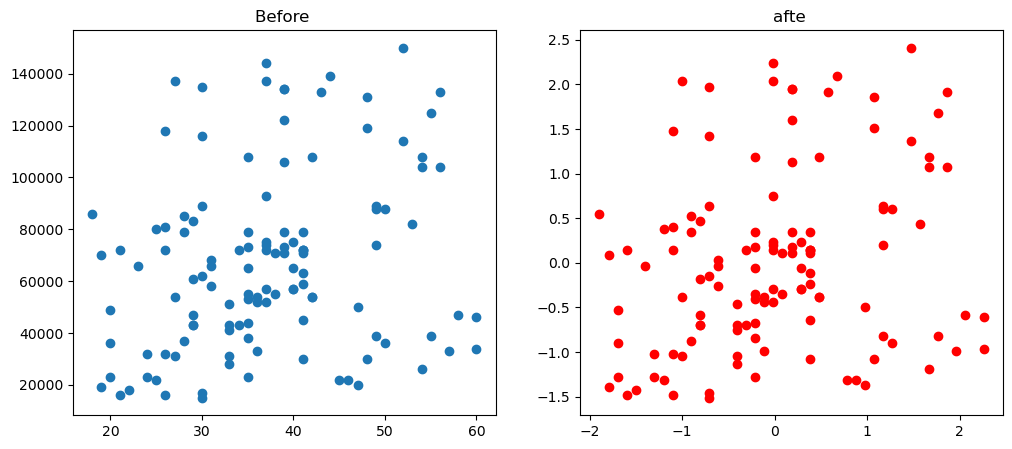

In [44]:
fig ,(a,b) = plt.subplots(ncols=2,figsize = (12,5))

a.scatter(X_train['Age'],X_train['EstimatedSalary'])
a.set_title('Before ')
b.scatter(X_train_scaled[0],X_train_scaled[1],color='red')
b.set_title('afte ')
plt.show()

<Axes: xlabel='0', ylabel='Density'>

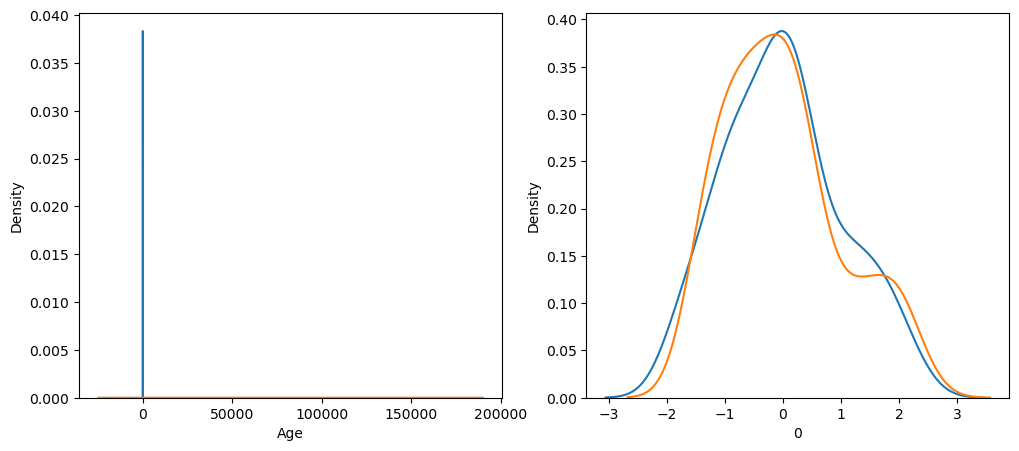

In [50]:


fig ,(a,b) = plt.subplots(ncols=2,figsize = (12,5))

sns.kdeplot(X_train['Age'],ax=a)
sns.kdeplot(X_train['EstimatedSalary'],ax=a)
sns.kdeplot(X_train_scaled[0],ax=b)
sns.kdeplot(X_train_scaled[1],ax=b)

<Axes: xlabel='0', ylabel='Density'>

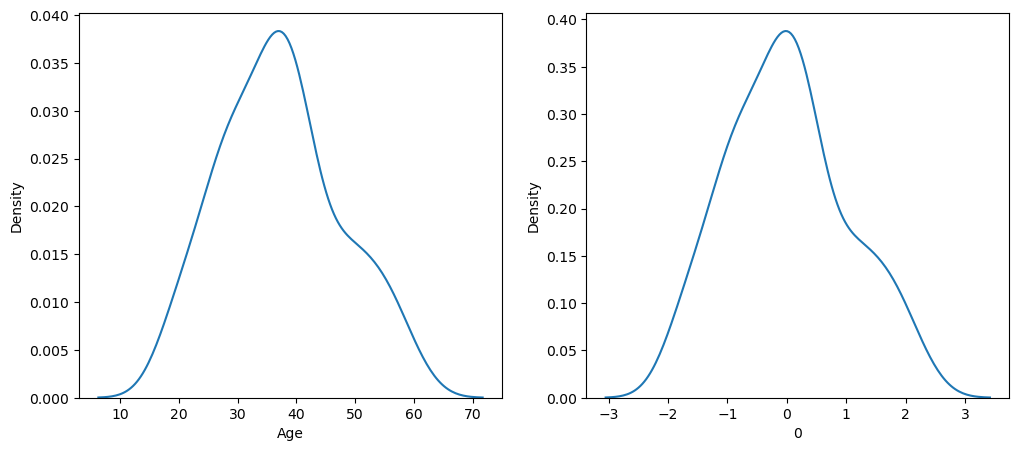

In [51]:


fig ,(a,b) = plt.subplots(ncols=2,figsize = (12,5))

sns.kdeplot(X_train['Age'],ax=a)

sns.kdeplot(X_train_scaled[0],ax=b)


<Axes: xlabel='1', ylabel='Density'>

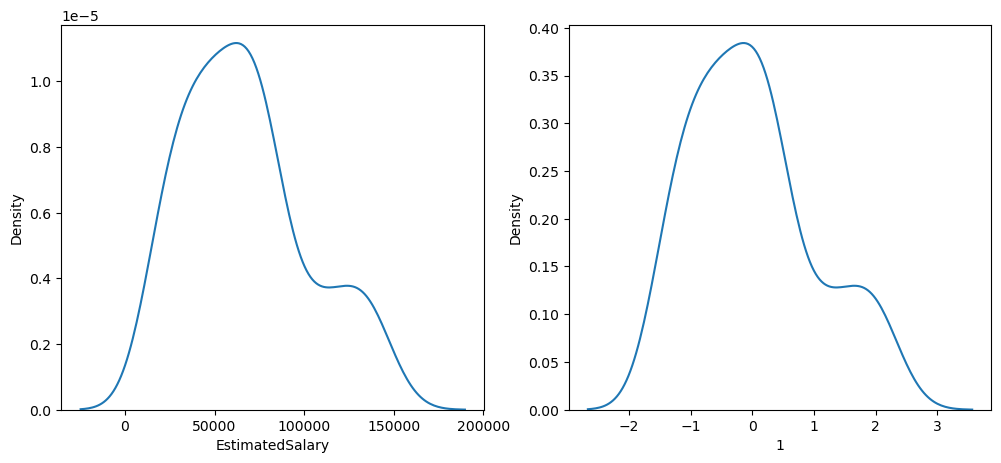

In [52]:
fig ,(a,b) = plt.subplots(ncols=2,figsize = (12,5))

sns.kdeplot(X_train['EstimatedSalary'],ax=a)

sns.kdeplot(X_train_scaled[1],ax=b)

## __Why scaling is important ?__

In [53]:
from sklearn.linear_model import LogisticRegression


In [59]:
lr = LogisticRegression()
lr_s = LogisticRegression()

In [60]:
lr.fit(X_train,y_train)
lr_s.fit(X_train_scaled,y_train)

LogisticRegression()

In [61]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_s.predict(X_test_scaled)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
print('Actual score ',accuracy_score(y_test,y_pred))
print('Scaled score ',accuracy_score(y_test,y_pred_scaled))

Actual score  0.7964285714285714
Scaled score  0.7821428571428571


In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)




DecisionTreeClassifier()

In [69]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [70]:
print('Actual score ',accuracy_score(y_test,y_pred))
print('Scaled score ',accuracy_score(y_test,y_pred_scaled))

Actual score  0.8392857142857143
Scaled score  0.8535714285714285


## __Effect of outliers__

- Agr hm outliers me tb bhi vo outliers hi rhega usse koi frk nji pdega 

- add some outliers in it

In [73]:
new_rows = pd.DataFrame({
    'Age': [7, 4, 3],
    'EstimatedSalary': [19393, 43343, 64564],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_rows], ignore_index=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,7,19393,0
401,4,43343,1


In [76]:
x = df.iloc[:,0:2]
y = df.iloc[: ,-1]
x


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
398,36,33000
399,49,36000
400,7,19393
401,4,43343


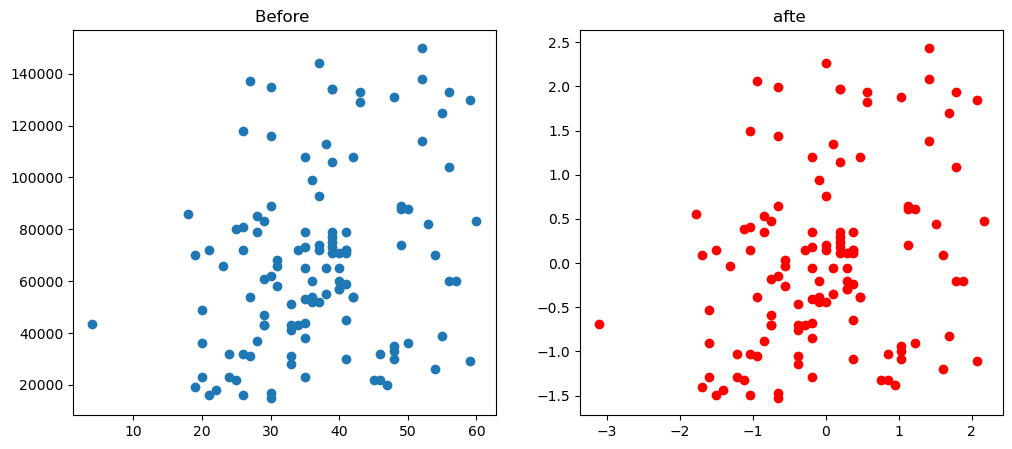

In [74]:
x = df.iloc[:,0:2]
y = df.iloc[: ,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler

s = StandardScaler()

s.fit(X_train)

# fit means mean of both the colm age and salary  calculate krna 
X_train_scaled = s.transform(X_train)
X_test_scaled = s.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

fig ,(a,b) = plt.subplots(ncols=2,figsize = (12,5))

a.scatter(X_train['Age'],X_train['EstimatedSalary'])
a.set_title('Before ')
b.scatter(X_train_scaled[0],X_train_scaled[1],color='red')
b.set_title('afte ')
plt.show()

## __When to use standardition__

⭐ When to Use Standardization (Z-score scaling)
1. When your ML algorithm uses distance

These models depend heavily on feature scale:

K-Means

K-NN (K-Nearest Neighbors)

SVM (Support Vector Machines)

Logistic Regression

Linear Regression

PCA (Principal Component Analysis)

Artificial Neural Network

Clustering algorithms

Neural networks (sometimes)

Gradient Descent

👉 Because if one feature has bigger values (like salary 50,000) and another has smaller values (age 25), the model gets biased toward the larger-scale feature.

- K-Means
- K-Nearest-Neighbours
- PCA
- Artificial Neural Network
- Gradient Descent